Nombres:
Juan Pablo Rivera Portilla

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.6 MB/s eta 0:00:00


Evaluación General:  6.313771517996871


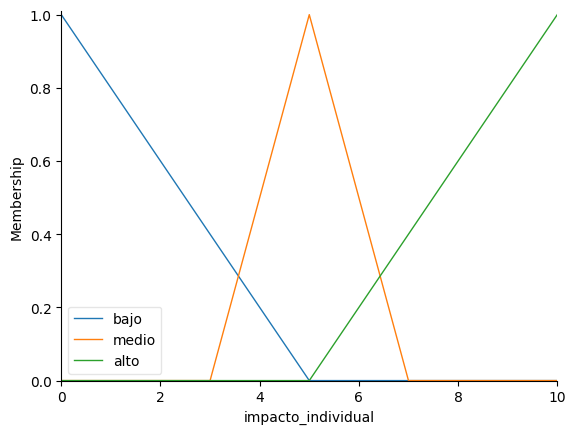

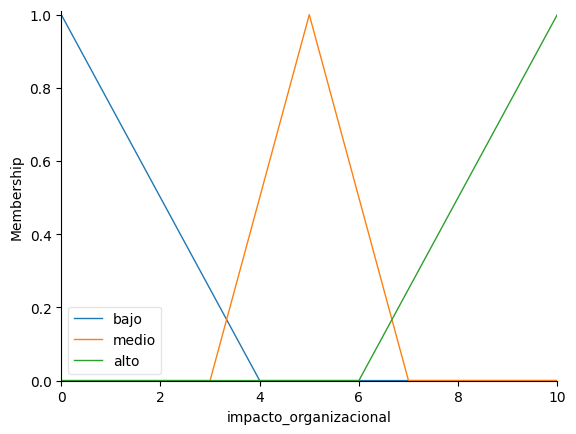

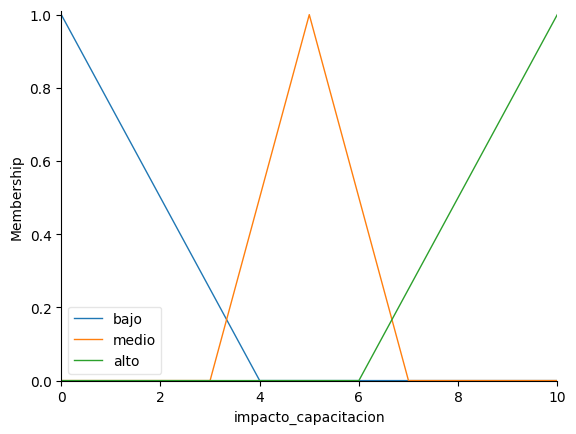

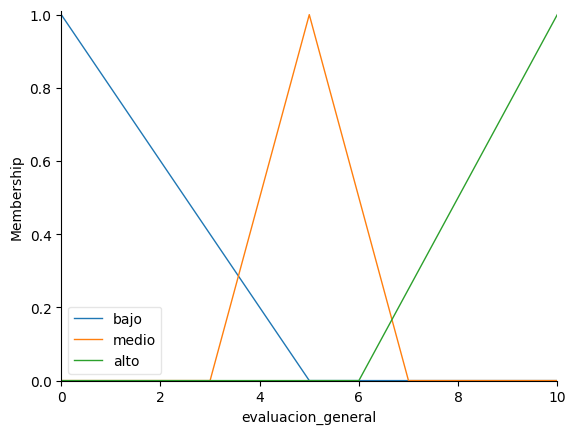

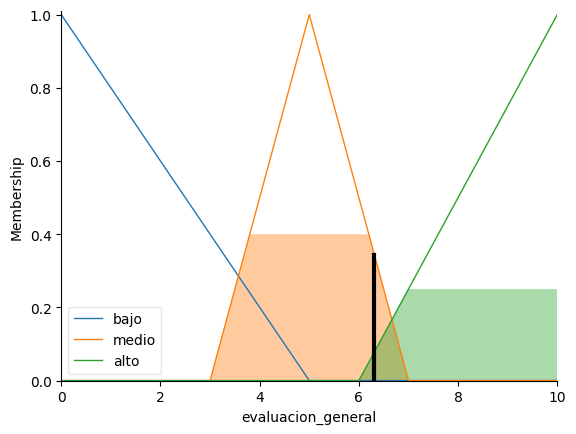

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

impacto_individual = ctrl.Antecedent(np.arange(0, 11, 1), 'impacto_individual')
impacto_organizacional = ctrl.Antecedent(np.arange(0, 11, 1), 'impacto_organizacional')
impacto_capacitacion = ctrl.Antecedent(np.arange(0, 11, 1), 'impacto_capacitacion')
evaluacion_general = ctrl.Consequent(np.arange(0, 11, 1), 'evaluacion_general')

impacto_individual['bajo'] = fuzz.trimf(impacto_individual.universe, [0, 0, 5])
impacto_individual['medio'] = fuzz.trimf(impacto_individual.universe, [3, 5, 7])
impacto_individual['alto'] = fuzz.trimf(impacto_individual.universe, [5, 10, 10])

impacto_organizacional['bajo'] = fuzz.trimf(impacto_organizacional.universe, [0, 0, 4])
impacto_organizacional['medio'] = fuzz.trimf(impacto_organizacional.universe, [3, 5, 7])
impacto_organizacional['alto'] = fuzz.trimf(impacto_organizacional.universe, [6, 10, 10])

impacto_capacitacion['bajo'] = fuzz.trimf(impacto_capacitacion.universe, [0, 0, 4])
impacto_capacitacion['medio'] = fuzz.trimf(impacto_capacitacion.universe, [3, 5, 7])
impacto_capacitacion['alto'] = fuzz.trimf(impacto_capacitacion.universe, [6, 10, 10])

evaluacion_general['bajo'] = fuzz.trimf(evaluacion_general.universe, [0, 0, 5])
evaluacion_general['medio'] = fuzz.trimf(evaluacion_general.universe, [3, 5, 7])
evaluacion_general['alto'] = fuzz.trimf(evaluacion_general.universe, [6, 10, 10])

impacto_individual.view()
impacto_organizacional.view()
impacto_capacitacion.view()
evaluacion_general.view()

rule1 = ctrl.Rule(impacto_individual['bajo'] & impacto_organizacional['bajo'], evaluacion_general['bajo'])
rule2 = ctrl.Rule(impacto_individual['medio'] & impacto_organizacional['medio'], evaluacion_general['medio'])
rule3 = ctrl.Rule(impacto_individual['alto'] & impacto_organizacional['alto'], evaluacion_general['alto'])
rule4 = ctrl.Rule(impacto_individual['alto'] | impacto_organizacional['alto'], evaluacion_general['medio'])
rule5 = ctrl.Rule(impacto_capacitacion['alto'] & impacto_organizacional['medio'], evaluacion_general['medio'])
rule6 = ctrl.Rule(impacto_capacitacion['bajo'] | impacto_individual['bajo'], evaluacion_general['bajo'])

impact_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
impact_simulation = ctrl.ControlSystemSimulation(impact_control)

impact_simulation.input['impacto_individual'] = 7
impact_simulation.input['impacto_organizacional'] = 7
impact_simulation.input['impacto_capacitacion'] = 5.7

impact_simulation.compute()

print("Evaluación General: ", impact_simulation.output['evaluacion_general'])
evaluacion_general.view(sim=impact_simulation)
